Import Neccessary Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns


In [2]:
print(plt.__version__)

1.26.4


Read Data

In [3]:
df = pd.read_csv("../Project/data/dataset.csv")

Next we are going to check our data or any missing values, etc.

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [5]:
#df.shape
#df.columns
df.dtypes
#df.describe()

Unnamed: 0            int64
track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object

Check to see whether there are any null values to be removed

In [6]:
pd.isnull(df).sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

There are 3 null values in artists album name and track name. We remove them and add the data to dfc which is the cleaned data frame

In [7]:
df[df.isna().any(axis=1)]

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,...,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


In [8]:
df=df.dropna()
pd.isnull(df).sum()

Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [9]:
df.shape

(113999, 21)

In [10]:
df[df.duplicated('track_id')==True].shape

(24259, 21)

In [11]:
example_duplicated_item = df[df['track_id'].str.contains('2K7xn816oNHJZ0aVqdQsha')] 
example_duplicated_item[["track_id","artists","album_name","track_name" ,"track_genre"]]

,track_id,artists,album_name,track_name,track_genre
2002,2K7xn816oNHJZ0aVqdQsha,The Neighbourhood,Hard To Imagine The Neighbourhood Ever Changing,Softcore,alt-rock
3002,2K7xn816oNHJZ0aVqdQsha,The Neighbourhood,Hard To Imagine The Neighbourhood Ever Changing,Softcore,alternative
91105,2K7xn816oNHJZ0aVqdQsha,The Neighbourhood,Hard To Imagine The Neighbourhood Ever Changing,Softcore,rock


So we figure out that there are some song entires that are repeated multiple times in the dataset with a different genre (alt-rock, rock, alternative) assigned to them. We drop these duplicated entries and keep only one of them.

In [12]:
df_clean = df.drop_duplicates(subset="track_id", keep='last', inplace=False, ignore_index=True)

In [13]:
df_clean.shape

(89740, 21)

In [14]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89740 entries, 0 to 89739
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        89740 non-null  int64  
 1   track_id          89740 non-null  object 
 2   artists           89740 non-null  object 
 3   album_name        89740 non-null  object 
 4   track_name        89740 non-null  object 
 5   popularity        89740 non-null  int64  
 6   duration_ms       89740 non-null  int64  
 7   explicit          89740 non-null  bool   
 8   danceability      89740 non-null  float64
 9   energy            89740 non-null  float64
 10  key               89740 non-null  int64  
 11  loudness          89740 non-null  float64
 12  mode              89740 non-null  int64  
 13  speechiness       89740 non-null  float64
 14  acousticness      89740 non-null  float64
 15  instrumentalness  89740 non-null  float64
 16  liveness          89740 non-null  float6

We observe that our song entries have been reduced to 89739. Another step in the cleaning process is to remove unimportant columns. We do not need the indexng column 'Unnamed' and the 'track_id' for our analysis so we just get rid of them.

In [15]:
df_clean = df_clean.drop(['Unnamed: 0', 'track_id'], axis=1)
df_clean.info()
df_clean.head()
#df_clean=df_clean.drop(['artists', 'album_name','track_id','track_genre'], axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89740 entries, 0 to 89739
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artists           89740 non-null  object 
 1   album_name        89740 non-null  object 
 2   track_name        89740 non-null  object 
 3   popularity        89740 non-null  int64  
 4   duration_ms       89740 non-null  int64  
 5   explicit          89740 non-null  bool   
 6   danceability      89740 non-null  float64
 7   energy            89740 non-null  float64
 8   key               89740 non-null  int64  
 9   loudness          89740 non-null  float64
 10  mode              89740 non-null  int64  
 11  speechiness       89740 non-null  float64
 12  acousticness      89740 non-null  float64
 13  instrumentalness  89740 non-null  float64
 14  liveness          89740 non-null  float64
 15  valence           89740 non-null  float64
 16  tempo             89740 non-null  float6

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.210,0.000000,0.1170,0.120,76.332,4,acoustic
1,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.905,0.000071,0.1320,0.143,181.740,3,acoustic
2,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.469,0.000000,0.0829,0.167,119.949,4,acoustic
3,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,74,189613,False,0.625,0.4140,0,-8.700,1,0.0369,0.294,0.000000,0.1510,0.669,130.088,4,acoustic
4,Zack Tabudlo,Episode,Give Me Your Forever,74,244800,False,0.627,0.3630,8,-8.127,1,0.0291,0.279,0.000000,0.0928,0.301,99.905,4,acoustic


In [16]:
df_clean['duration']=df_clean['duration_ms']/1000/60

In [17]:
df_clean=df_clean.drop(['duration_ms'], axis=1)

In [18]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89740 entries, 0 to 89739
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artists           89740 non-null  object 
 1   album_name        89740 non-null  object 
 2   track_name        89740 non-null  object 
 3   popularity        89740 non-null  int64  
 4   explicit          89740 non-null  bool   
 5   danceability      89740 non-null  float64
 6   energy            89740 non-null  float64
 7   key               89740 non-null  int64  
 8   loudness          89740 non-null  float64
 9   mode              89740 non-null  int64  
 10  speechiness       89740 non-null  float64
 11  acousticness      89740 non-null  float64
 12  instrumentalness  89740 non-null  float64
 13  liveness          89740 non-null  float64
 14  valence           89740 non-null  float64
 15  tempo             89740 non-null  float64
 16  time_signature    89740 non-null  int64 

In [19]:
num_cols = []
cat_cols = []
for col in df_clean.columns:
    if df_clean[col].dtype == np.float64 or df_clean[col].dtype == np.int64:
        num_cols.append(col)
    else:
        cat_cols.append(col)

print('Continuous columns:', num_cols)
print('Categorical columns:', cat_cols)

Continuous columns: ['popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'duration']
Categorical columns: ['artists', 'album_name', 'track_name', 'explicit', 'track_genre']


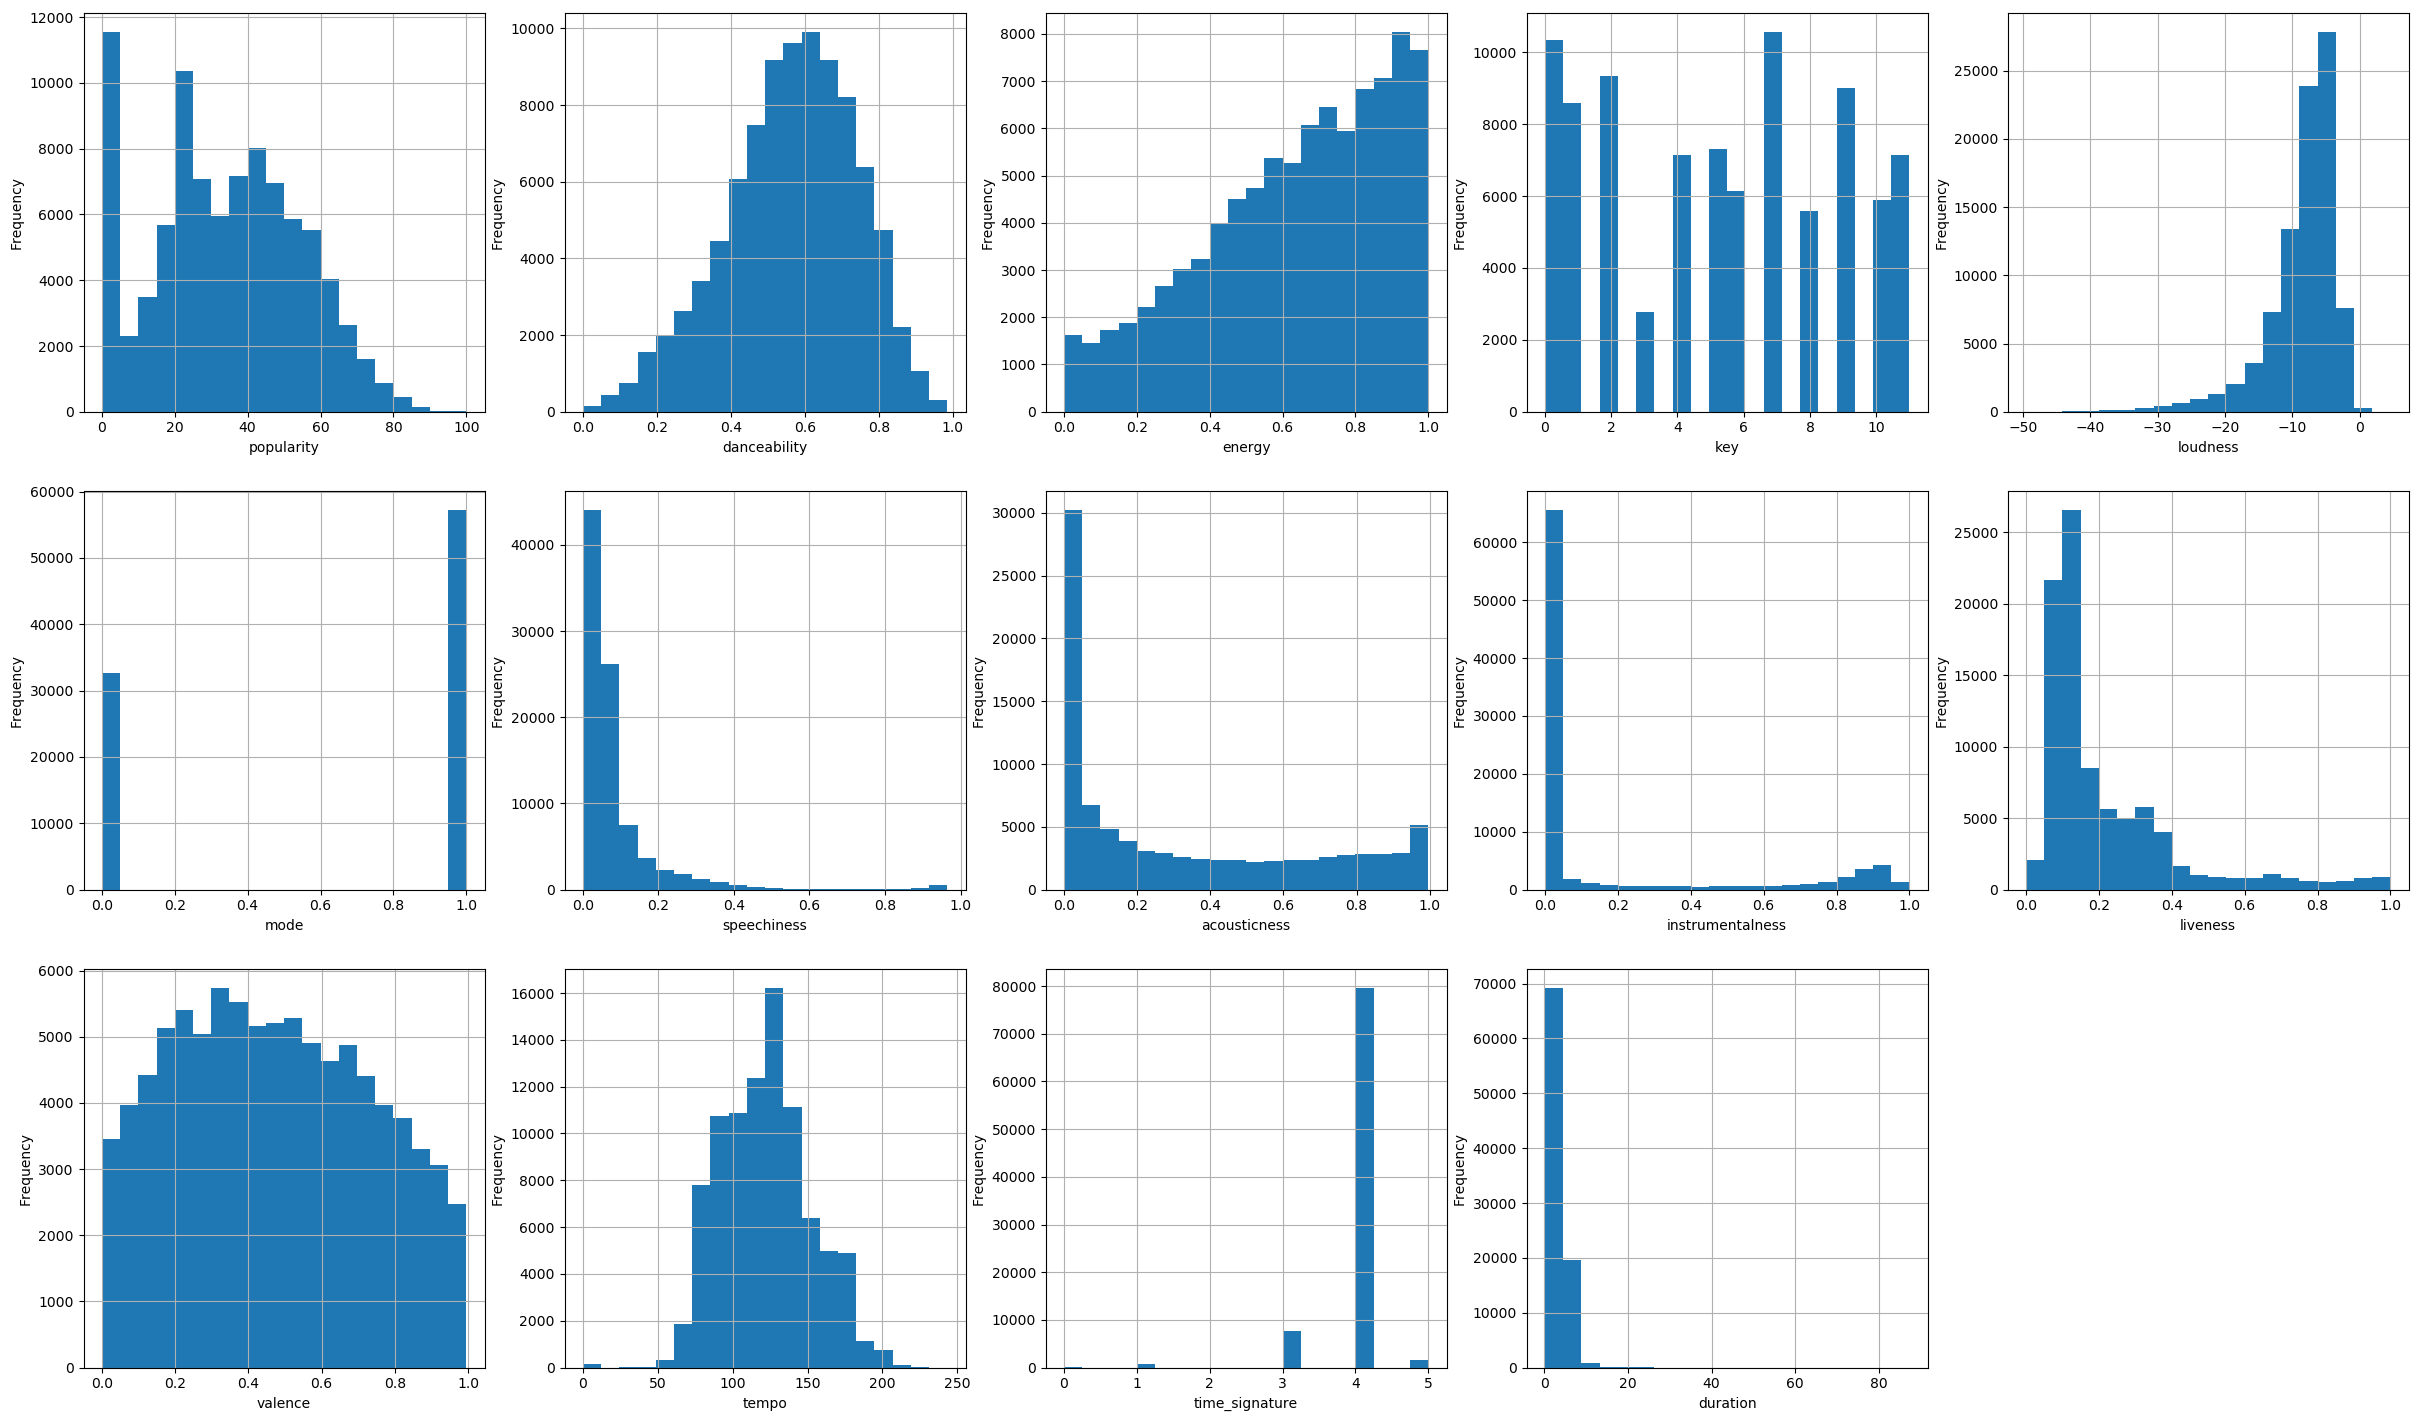

In [20]:
i=1
for col in num_cols:
    plt.subplot(5,5,i)
    df_clean[col].hist(bins=20, figsize=(30, 30))
    plt.ylabel('Frequency')
    plt.xlabel(col)
    i=i+1
    #plt.xlabel('col.value')

In [21]:
df_clean[df_clean['track_genre'].str.contains('rock')].sort_values('duration',ascending=False).head(2)

,artists,album_name,track_name,popularity,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration
63544,Pink Floyd,Meddle,Echoes,57,False,0.285,0.322,6,-16.580,0,0.0445,0.367,0.649,0.107,0.138,133.577,4,psych-rock,23.54085
64337,Grateful Dead,So Many Roads (1965 - 1995),Scarlet Begonias / Fire on the Mountain - Live...,26,False,0.545,0.730,4,-10.456,1,0.0578,0.572,0.227,0.971,0.797,88.756,4,psych-rock,19.56710


Text(0.5,0,'Duration (min)')

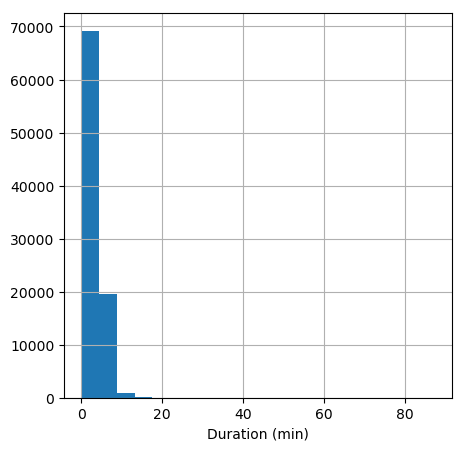

In [22]:
df_clean.duration.hist(bins=20, figsize=(5, 5))
plt.xlabel('Duration (min)')

In [23]:
df_clean=df_clean[df_clean.duration < 24]

Text(0.5,0,'Duration (min)')

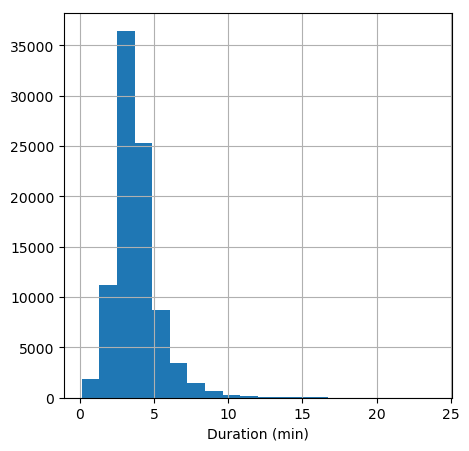

In [24]:
df_clean.duration.hist(bins=20, figsize=(5, 5))
plt.xlabel('Duration (min)')

In [25]:
df_clean=df_clean[df_clean.time_signature > 2]

Text(0.5,0,'Time Signature')

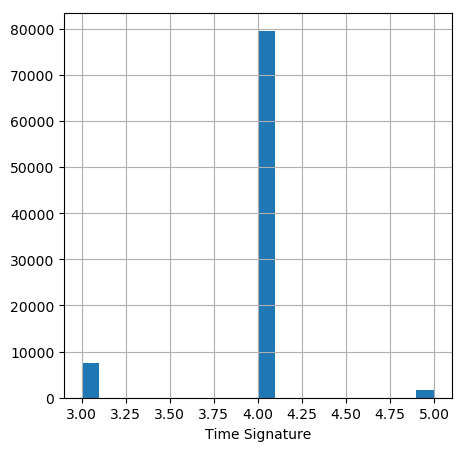

In [26]:
df_clean.time_signature.hist(bins=20, figsize=(5, 5))
plt.xlabel('Time Signature')

In [27]:
df_clean.shape

(88685, 19)

In [28]:
#df_clean.sort_values('speechiness',ascending=False).head(200)

In [29]:
df_clean = df_clean[(df_clean.speechiness < 0.66)]

In [171]:
df_clean.shape

(87873, 19)

In [ ]:
#df1.sort_values('instrumentalness',ascending=True).head(200)

In [172]:
#genre_popularity = df_clean.groupby('track_genre')['popularity'].mean()

#genre_popularity_sorted = genre_popularity.sort_values(ascending=False)
#This code calculates the average popularity for each genre and sorts them in descending order. 
#It provides insights into which genres tend to have higher or lower popularity ratings.
#top_genres = genre_popularity_sorted.head(20)

In [ ]:
#Genre-based analysis of popularity
#plt.figure(figsize=(12, 6))
#sns.barplot(x=top_genres.index, y=top_genres.values, palette="dark")
#plt.title("Average Popularity by Genre")
#plt.xlabel('Genre')
#plt.ylabel('Average Popularity')
#plt.xticks(rotation=90)
#plt.tight_layout()
#plt.show()

In [ ]:
#artists_popularity = df_clean.groupby('artists')['popularity'].mean()

#artists_popularity_sorted = artists_popularity.sort_values(ascending=False)
#This code calculates the average popularity for each genre and sorts them in descending order. 
#It provides insights into which genres tend to have higher or lower popularity ratings.
##top_artists = artists_popularity_sorted.head(20)
#top_artists.head(20)

In [ ]:
#Genre-based analysis of popularity
#plt.figure(figsize=(12, 6))
#sns.barplot(x=top_artists.index, y=top_genres.values, palette="dark")
##plt.title("Average Popularity by Artist")
#plt.xlabel('Artist')
#plt.ylabel('Average Popularity')
#plt.xticks(rotation=90)
#plt.tight_layout()
#plt.show()

In [30]:
num_cols = []
cat_cols = []
for col in df_clean.columns:
    if df_clean[col].dtype == np.float64 or df_clean[col].dtype == np.int64:
        num_cols.append(col)
    else:
        cat_cols.append(col)

print('Continuous columns:', num_cols)
print('Categorical columns:', cat_cols)

Continuous columns: ['popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'duration']
Categorical columns: ['artists', 'album_name', 'track_name', 'explicit', 'track_genre']


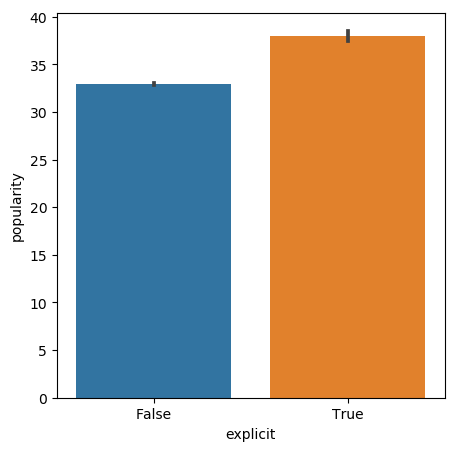

In [32]:
#for column in cat_cols:
plt.figure(figsize=(5, 5))
sns.barplot(x='explicit', y=df_clean['popularity'], data=df_clean)#, estimator=np.mean)
plt.show()

In [ ]:
num_cols = df_clean.select_dtypes(include=['int64', 'float64'])
corr_data = num_cols.corr()

fig, ax = plt.subplots(figsize=(20, 8))
sns.heatmap(corr_data, cmap="YlGnBu", annot=True)

plt.show()

In [ ]:
corr_pop = df_clean.corr(method='pearson', numeric_only=True)
#This code calculates the Pearson correlation coefficient between popularity and other musical features,
# excluding irrelevant columns.

plt.figure(figsize=(14,6))
heatmap = sns.heatmap(corr_pop,annot=True,fmt='.3f', vmin=-1.0, vmax=1.0, center=0.05, cmap='inferno', linewidths=1, linecolor='Black')
heatmap.set_title("Correlation HeatMap Between Variables")
heatmap.set_xticklabels(heatmap.get_xticklabels(),rotation=90)

In [33]:
df_small=df_clean.drop(['artists', 'album_name','track_name','track_genre'], axis=1)

In [34]:
df_small['explicit'].describe

<bound method NDFrame.describe of 0        False
1        False
2        False
3        False
4        False
         ...  
89735    False
89736    False
89737    False
89738    False
89739    False
Name: explicit, Length: 87873, dtype: bool>

In [35]:
df_small['explicit']=df_small['explicit']*1

In [36]:
df_small.describe()

,popularity,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration
count,87873.000000,87873.000000,87873.000000,87873.000000,87873.000000,87873.000000,87873.000000,87873.000000,87873.000000,87873.000000,87873.000000,87873.000000,87873.000000,87873.000000,87873.000000
mean,33.337089,0.081140,0.564620,0.636464,5.288997,-8.404058,0.636077,0.079625,0.321282,0.172653,0.211639,0.472198,122.615639,3.934007,3.802638
std,20.652882,0.273051,0.175131,0.254904,3.562274,5.120061,0.481130,0.079663,0.335089,0.322909,0.187578,0.262511,29.591314,0.309114,1.528034
min,0.000000,0.000000,0.051300,0.000020,0.000000,-46.591000,0.000000,0.022100,0.000000,0.000000,0.009250,0.000000,30.200000,3.000000,0.263333
25%,19.000000,0.000000,0.452000,0.460000,2.000000,-10.204000,0.000000,0.035900,0.016500,0.000000,0.097800,0.252000,99.961000,4.000000,2.896100
50%,34.000000,0.000000,0.578000,0.678000,5.000000,-7.128000,1.000000,0.048700,0.179000,0.000062,0.131000,0.461000,122.417000,4.000000,3.560433
75%,49.000000,0.000000,0.694000,0.854000,8.000000,-5.083000,1.000000,0.084000,0.608000,0.095700,0.272000,0.685000,140.240000,4.000000,4.403450
max,100.000000,1.000000,0.985000,1.000000,11.000000,4.532000,1.000000,0.659000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000,23.850700


In [109]:
corr_matrix = df_small.corr()

corr_matrix['popularity'].sort_values(ascending=False)

popularity          1.000000
loudness            0.070888
explicit            0.066364
danceability        0.063677
time_signature      0.033746
energy              0.013843
tempo               0.003674
key                 0.001920
liveness           -0.001727
valence            -0.013865
mode               -0.016026
speechiness        -0.019816
duration           -0.023387
acousticness       -0.031291
instrumentalness   -0.131541
Name: popularity, dtype: float64

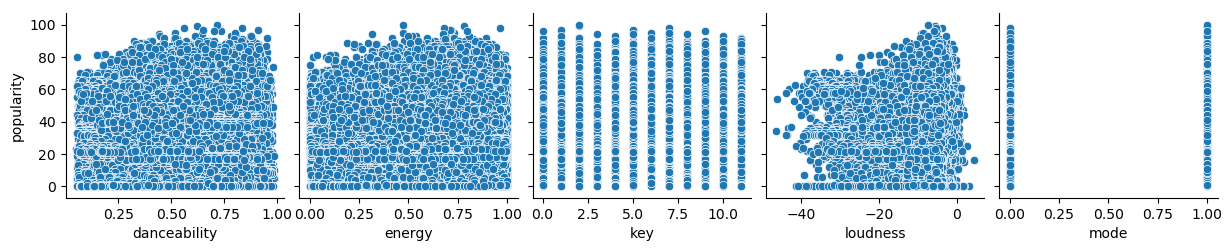

In [159]:
sns.pairplot(
    df_small,
    x_vars=['danceability', 'energy', 'key', 'loudness', 'mode'],
    y_vars=["popularity"],
)

In [115]:
popularity_decision = df_small.copy()
popularity_decision['decision'] = ''

for i, row in popularity_decision.iterrows():
    score = 'Not Popular'
  # if row.popularity >= 25:
 ##       score = 'Slightly Popular'
    if row.popularity >= 50:
        score = 'Popular'
  #  if row.popularity >= 75:
  #      score = 'Hit Song'
    popularity_decision.at[i, 'decision'] = score

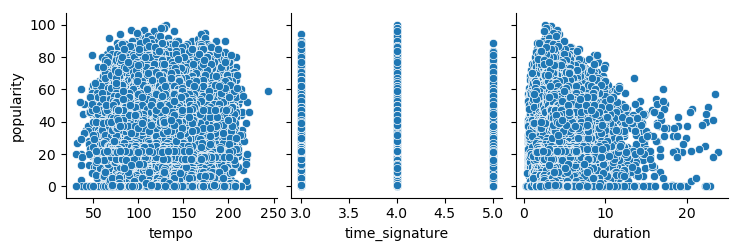

In [161]:
sns.pairplot(
    df_small,
    x_vars=['tempo', 'time_signature', 'duration'],
    y_vars=["popularity"],
)

In [ ]:
, 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'duration'

In [116]:
popularity_decision['decision'].value_counts()

decision
Not Popular    66850
Popular        21023
Name: count, dtype: int64

In [ ]:
#Energy distribution in different popularities 
#high_energy_genres = top_genres.head(20)  # Select the top 20 genres with highest popularity

#plt.figure(figsize=(10, 6))

# Box plot or violin plot for high energy genres
#sns.barplot(x='decision', y='explicit', data=popularity_decision, palette="husl")
#plt.title("Distribution of Energy in High Energy Genres")
#plt.xlabel("Genre")
#plt.ylabel("Energy")
#plt.xticks(rotation=45)


#plt.show()

In [117]:
popularity_decision.decision

0            Popular
1            Popular
2            Popular
3            Popular
4            Popular
            ...     
89735    Not Popular
89736    Not Popular
89737    Not Popular
89738    Not Popular
89739    Not Popular
Name: decision, Length: 87873, dtype: object

In [ ]:
for col in  popularity_decision.columns[:-2]:
    plt.figure(figsize=(8,5))

    plt.hist(popularity_decision.loc[popularity_decision.decision=='Not Popular', col].values,
                color='b',
                alpha=.8,
                label='Not Popular')

    plt.hist(popularity_decision.loc[popularity_decision.decision=='Slightly Popular', col].values,
                color='r',
                alpha=.2,
                hatch = '|',
                edgecolor='black',
                label="Slightly Popular")

    plt.hist(popularity_decision.loc[popularity_decision.decision=='Popular', col].values,
                color='y',
                alpha=.4,
                hatch = '*',
                edgecolor='black',
                label="Popular")

    plt.hist(popularity_decision.loc[popularity_decision.decision=='Hit Song', col].values,
                color='k',
                alpha=.6,
                hatch = '\\',
                label='Hit Song')

    plt.xlabel(col, fontsize=14)
    plt.legend(fontsize=14)

    plt.show()

In [118]:
popularity_decision[['energy', 'liveness', 'popularity', 'decision']].head()

,energy,liveness,popularity,decision
0,0.3590,0.1170,57,Popular
1,0.0596,0.1320,71,Popular
2,0.4430,0.0829,82,Popular
3,0.4140,0.1510,74,Popular
4,0.3630,0.0928,74,Popular


In [119]:
popularity_decision[['popularity']].value_counts()

popularity
0             9224
21            2091
22            2086
20            1936
23            1897
              ... 
96               2
97               2
98               2
99               1
100              1
Name: count, Length: 101, dtype: int64

In [120]:
popularity_decision = popularity_decision[popularity_decision.popularity > 0]

In [121]:
popularity_decision[['popularity']].value_counts()

popularity
21            2091
22            2086
20            1936
23            1897
44            1685
              ... 
96               2
97               2
98               2
99               1
100              1
Name: count, Length: 100, dtype: int64

In [122]:
pop_dec_att=popularity_decision.drop(['decision','popularity'],axis=1)


In [123]:
pop_dec_att.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78649 entries, 0 to 89739
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   explicit          78649 non-null  int32  
 1   danceability      78649 non-null  float64
 2   energy            78649 non-null  float64
 3   key               78649 non-null  int64  
 4   loudness          78649 non-null  float64
 5   mode              78649 non-null  int64  
 6   speechiness       78649 non-null  float64
 7   acousticness      78649 non-null  float64
 8   instrumentalness  78649 non-null  float64
 9   liveness          78649 non-null  float64
 10  valence           78649 non-null  float64
 11  tempo             78649 non-null  float64
 12  time_signature    78649 non-null  int64  
 13  duration          78649 non-null  float64
dtypes: float64(10), int32(1), int64(3)
memory usage: 8.7 MB


In [124]:
pop_dec_att.shape

(78649, 14)

In [125]:
X = pop_dec_att#.select_dtypes(include='number')
y = popularity_decision['decision']

In [142]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
model_X = scaler.fit(X)
X_scaled = model_X.transform(X)

X_train, X_test, y_train, y_test = train_test_split (X_scaled, y, random_state=25670, test_size=0.3, shuffle=True,stratify=y)

In [127]:
y_train.value_counts(normalize=True)

decision
Not Popular    0.732699
Popular        0.267301
Name: proportion, dtype: float64

In [128]:
y_test.value_counts(normalize=True)

decision
Not Popular    0.732698
Popular        0.267302
Name: proportion, dtype: float64

In [129]:
from sklearn import datasets, linear_model, metrics

log_reg = linear_model.LogisticRegression(solver = 'lbfgs', max_iter = 2000)

#train the model using training set
log_reg.fit(X_train, y_train)

#making predictions on the testing set
y_pred = log_reg.predict(X_test)

#printing accuracy of algorithm
print("Logistic Regression Model Accuracy (in %):",
metrics.accuracy_score(y_test, y_pred) * 100)

Logistic Regression Model Accuracy (in %): 73.33333333333333


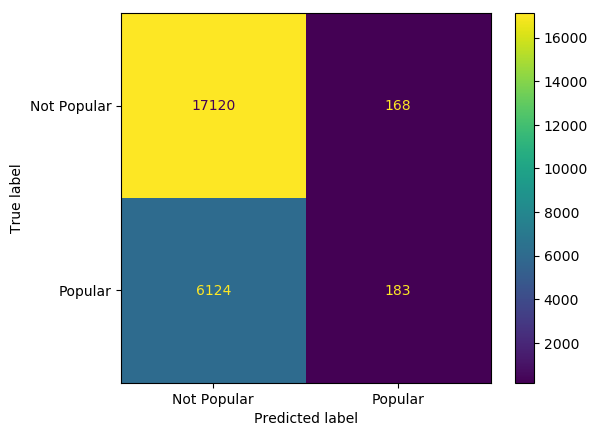

[[17120   168]
 [ 6124   183]]
              precision    recall  f1-score   support

 Not Popular       0.74      0.99      0.84     17288
     Popular       0.52      0.03      0.05      6307

    accuracy                           0.73     23595
   macro avg       0.63      0.51      0.45     23595
weighted avg       0.68      0.73      0.63     23595



In [130]:
#importing confusion matrix and classification report
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC

clf = SVC(random_state=42)
clf.fit(X_train, y_train)
#SVC(random_state=0)
#predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()

plt.show()
#printing confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [131]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

#printing confusion matrix and classification report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
#printing accuracy of algorithm
print("KNN Model Accuracy (in %):",
metrics.accuracy_score(y_test, pred) * 100)

[[16549   739]
 [ 5515   792]]
              precision    recall  f1-score   support

 Not Popular       0.75      0.96      0.84     17288
     Popular       0.52      0.13      0.20      6307

    accuracy                           0.73     23595
   macro avg       0.63      0.54      0.52     23595
weighted avg       0.69      0.73      0.67     23595

KNN Model Accuracy (in %): 73.49438440347531


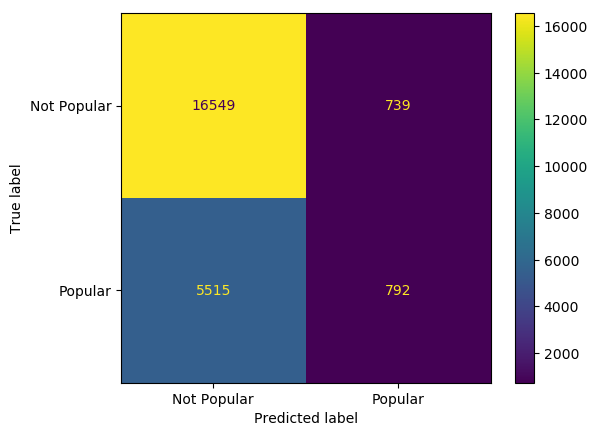

[[16549   739]
 [ 5515   792]]
              precision    recall  f1-score   support

 Not Popular       0.75      0.96      0.84     17288
     Popular       0.52      0.13      0.20      6307

    accuracy                           0.73     23595
   macro avg       0.63      0.54      0.52     23595
weighted avg       0.69      0.73      0.67     23595



In [147]:
#importing confusion matrix and classification report
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC

clf = SVC(random_state=42)
clf.fit(X_train, y_train)
#SVC(random_state=0)
#predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()

plt.show()
#printing confusion matrix and classification report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

In [145]:
from sklearn.ensemble import RandomForestClassifier

rforest = RandomForestClassifier(n_estimators = 300)

rforest.fit(X_train, y_train)

y_pred2 = rforest.predict(X_test)

#printing confusion matrix and classification report
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))
#printing accuracy of algorithm
print("Random Forest Model Accuracy (in %):",
metrics.accuracy_score(y_test, y_pred2) * 100)

[[16719   569]
 [ 5343   964]]
              precision    recall  f1-score   support

 Not Popular       0.76      0.97      0.85     17288
     Popular       0.63      0.15      0.25      6307

    accuracy                           0.75     23595
   macro avg       0.69      0.56      0.55     23595
weighted avg       0.72      0.75      0.69     23595

Random Forest Model Accuracy (in %): 74.94384403475313


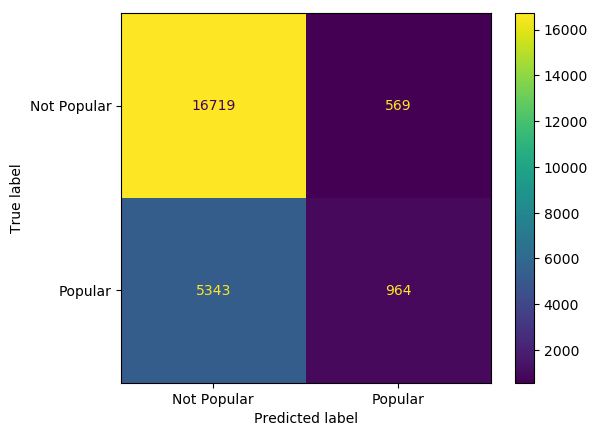

[[16719   569]
 [ 5343   964]]
              precision    recall  f1-score   support

 Not Popular       0.76      0.97      0.85     17288
     Popular       0.63      0.15      0.25      6307

    accuracy                           0.75     23595
   macro avg       0.69      0.56      0.55     23595
weighted avg       0.72      0.75      0.69     23595



In [146]:
#importing confusion matrix and classification report
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC

clf = SVC(random_state=42)
clf.fit(X_train, y_train)
#SVC(random_state=0)
#predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred2, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()

plt.show()
#printing confusion matrix and classification report
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))